## Paquets i dades originals ## 

In [1]:
import pandas as pd

taula = pd.read_pickle('./data/processed/dataframe.pkl')
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from auxiliary_functions import xi_quadrat_test, test_indepe, test_indepe_plot, test_indepe_bin_plot

##text justificació, poden haver-hi resultats erronis deguts a errors humans presents en les dades proporcionades##

Prèviament, he tractat les dades creant noves columnes que classifiquen millor tota la informació disponible

In [2]:
taula.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
0,89,F,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,None,None,NaT,None,None,None,2020-06-18,NaN
1,70,M,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,>90,70,53.7,2022-07-06,NaT,None,None,16.3,2022-09-29,NaN
2,96,M,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-09 00...",[],...,None,None,None,None,NaT,None,None,None,2020-07-08,NaN
3,85,M,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,None,2020-12-04,None,None,None,2020-12-02,2.0
4,93,M,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,Proves afegides a un altre petició per extracc...,49.900,49.900,2022-06-02,NaT,None,None,0.0,2022-08-07,NaN


Distribuiré les dades en 3 grups (més un grup que conté la totalitat de dades):
- **AMB_PA**: aquest grup està compost per pacients que contenen el codi ICD de pneumònia aspirativa al seu historial.
- **AMB_PA_MECVV**: aquest grup conté els pacients que compleixen les següents característiques: 
    - Han donat positiu al MECVV (és a dir, que tenen disfàgia i una alteració en la seguretat o en l'eficàcia)
    - Han sigut diagnosticats amb el codi ICD de pneumònia
    - Han passat menys de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu al MECVV
- **SENSE_PA**: aquest grup està format per pacients que contenen el codi ICD de pneumònia o bé:
    - Contenen el codi ICD de pneumònia
    - Han donat positiu al MECVV 
    - Han passat més de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu del MECVV 
- **TOTAL**: aquest grup conté tots els pacients de l'estudi

# AMB_PA 

In [3]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
0,89,F,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,None,None,NaT,None,None,None,2020-06-18,NaN
1,70,M,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,>90,70,53.7,2022-07-06,NaT,None,None,16.3,2022-09-29,NaN
3,85,M,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,None,2020-12-04,None,None,None,2020-12-02,2.0
6,101,F,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,None,None,2021-08-19,None,None,None,2021-08-17,2.0
12,86,M,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '46.4', 'data': '2020-09-09'}]","[{'codi': 'G04CA', 'dataInici': '2020-09-04 00...","[{'data': '20200907110400', 'disfagia': 'S', '...",...,None,46.4,46.4,2020-09-09,2020-09-07,46.4,0.0,0.0,2020-09-04,3.0


# AMB_PA_MECVV

In [4]:
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)] 
AMB_PA_MECVV.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
3,85,M,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,None,2020-12-04,None,None,None,2020-12-02,2.0
6,101,F,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,None,None,2021-08-19,None,None,None,2021-08-17,2.0
12,86,M,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '46.4', 'data': '2020-09-09'}]","[{'codi': 'G04CA', 'dataInici': '2020-09-04 00...","[{'data': '20200907110400', 'disfagia': 'S', '...",...,None,46.4,46.4,2020-09-09,2020-09-07,46.4,0.0,0.0,2020-09-04,3.0
27,100,M,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2021-09-14'}, {'valor...","[{'codi': 'C08CA', 'dataInici': '2020-11-23 00...","[{'data': '20201125131827', 'disfagia': 'S', '...",...,None,41.100,0,2021-01-20,2020-11-25,None,None,41.1,2020-12-02,7.0
28,95,F,0,"[{'date': '20220526', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2022-05-30'}]","[{'codi': 'C10AA', 'dataInici': '2020-11-18 00...","[{'data': '20220529115841', 'disfagia': 'S', '...",...,48,0,0,2022-05-30,2022-05-29,0,0.0,0.0,2022-05-23,6.0


# SENSE_PA

In [5]:
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) & 
           (taula['P diagnosticada'] == 1.0)]
SENSE_PA.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
13,71,F,0,"[{'date': '20220216', 'name': 'CULTIU Esput', ...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...","[{'dataValoracio': '2020-09-06', 'horaValoraci...",[],"[{'codi': 'C10AA', 'dataInici': '2020-09-06 00...","[{'data': '20200906175506', 'disfagia': 'N', '...",...,70,None,None,None,2020-09-07,None,None,None,2022-02-14,525.0
25,83,F,0,"[{'date': '20220308', 'name': 'UREA Sèrum', 'l...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '0', 'estatMental': '1', 'humit...",[],"[{'valor': '57', 'data': '2022-11-03'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2022-09-27 00...","[{'data': '20220929091303', 'disfagia': 'S', '...",...,38,57,63.2,2022-11-03,2022-09-29,None,None,-6.2,2023-04-09,192.0
31,89,M,0,"[{'date': '20220318', 'name': 'BILIRUBINA TOTA...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '75', 'data': '2022-01-11'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2021-12-23 00...","[{'data': '20220119101523', 'disfagia': 'N', '...",...,78,75,67,2022-01-11,2022-02-01,None,None,8.0,2023-05-05,458.0
39,87,F,0,"[{'date': '20230619', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2021-01-17 00...","[{'data': '20220111085147', 'disfagia': 'S', '...",...,>90,None,None,None,2022-01-11,None,None,None,2023-06-19,524.0
41,93,F,0,"[{'date': '20221013', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '0', 'data': '2023-06-02'}, {'valor...","[{'codi': 'C10AA', 'dataInici': '2021-02-05 00...","[{'data': '20230530155654', 'disfagia': 'S', '...",...,48,0,60,2023-06-02,2023-05-30,0,0.0,-60.0,2023-03-21,70.0


# TOTAL

In [6]:
TOTAL = taula
taula.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
0,89,F,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,None,None,NaT,None,None,None,2020-06-18,NaN
1,70,M,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,>90,70,53.7,2022-07-06,NaT,None,None,16.3,2022-09-29,NaN
2,96,M,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-09 00...",[],...,None,None,None,None,NaT,None,None,None,2020-07-08,NaN
3,85,M,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,None,2020-12-04,None,None,None,2020-12-02,2.0
4,93,M,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,Proves afegides a un altre petició per extracc...,49.900,49.900,2022-06-02,NaT,None,None,0.0,2022-08-07,NaN


Ara que tinc totes les dades classificades en aquests grups, faré una descriptiva. També compararé els diferents grups amb el pvalor mitjançant T-test, test de Mann-Whitney o test Xi-quadrat per mirar la seva distribució, la qual esperaré que sigui similar entre el grup AMB_PA i AMB_PA_MECVV, i diferent entre SENSE_PA i els altres 2 grups. Els criteris que seguiré per utilitzar un test o un altre és, primer, fer un test de Shapiro-Wilk per comprovar si segueixen una distribució normal, si és així, usaré el T-test, si no, utilitzaré el de Mann-Whitney. Finalment, si la columna conté valors categòrics com és el cas del sexe (F/M), faré servir el test Xi-quadrat.


## Nombre de pacients

In [7]:
num_AMB_PA = len(AMB_PA)
num_AMB_PA_MECVV= len(AMB_PA_MECVV)
num_SENSE_PA = len(SENSE_PA)
num_TOTAL = len(TOTAL)

print(num_AMB_PA, num_AMB_PA_MECVV, num_SENSE_PA, num_TOTAL)

17 8 8 50


#### Comparació distributiva

##### Test d'independència

No es pot calcular la normalitat perquè només hi ha un valor per grup i tampoc té sentit calcular el p-valor.  

## Edat

In [8]:
edat_AMB_PA = AMB_PA['edat'].mean()
desviacio_estandard_edat = AMB_PA['edat'].std()

resultat = f"{edat_AMB_PA:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)


Mitjana ± Desviació Estàndard de l'edat: 87.06 ± 8.99


In [9]:
edat_AMB_PA_MECVV = AMB_PA_MECVV['edat'].mean()
desviacio_estandard_edat = AMB_PA_MECVV['edat'].std()

resultat = f"{edat_AMB_PA_MECVV:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

Mitjana ± Desviació Estàndard de l'edat: 91.50 ± 6.82


In [10]:
edat_SENSE_PA = SENSE_PA['edat'].mean()
desviacio_estandard_edat = SENSE_PA['edat'].std()

resultat = f"{edat_SENSE_PA:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

Mitjana ± Desviació Estàndard de l'edat: 86.25 ± 6.90


In [11]:
edat_TOTAL = TOTAL['edat'].mean()
desviacio_estandard_TOTAL = TOTAL['edat'].std()

resultat = f"{edat_TOTAL:.2f} ± {desviacio_estandard_TOTAL:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

Mitjana ± Desviació Estàndard de l'edat: 80.32 ± 16.89


#### Comparació distributiva

##### Normalitat i p-valor --> Test d'independència

In [12]:
test_indepe({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

Resultado del test Shapiro-Wilk para AMB_PA:
  p-valor = 0.3297
  El grupo sigue una distribución normal.
Resultado del test Shapiro-Wilk para AMB_PA_MECVV:
  p-valor = 0.0600
  El grupo sigue una distribución normal.
Comparación entre AMB_PA y AMB_PA_MECVV usando t-test:
  Estadístico de prueba = -1.2347
  Valor p = 0.2294
  No hay una diferencia significativa entre los grupos.

Resultado del test Shapiro-Wilk para AMB_PA:
  p-valor = 0.3297
  El grupo sigue una distribución normal.
Resultado del test Shapiro-Wilk para SENSE_PA:
  p-valor = 0.0619
  El grupo sigue una distribución normal.
Comparación entre AMB_PA y SENSE_PA usando t-test:
  Estadístico de prueba = 0.2243
  Valor p = 0.8245
  No hay una diferencia significativa entre los grupos.

Resultado del test Shapiro-Wilk para AMB_PA:
  p-valor = 0.3297
  El grupo sigue una distribución normal.
Resultado del test Shapiro-Wilk para TOTAL:
  p-valor = 0.0000
  El grupo no sigue una distribución normal.
Comparación entre AMB_PA y TO

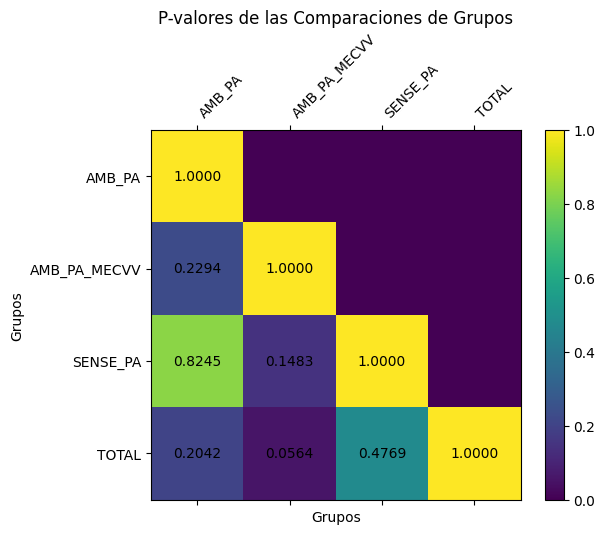

In [13]:
test_indepe_plot({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

## Sexe

In [14]:
sexe_AMB_PA = AMB_PA['sexe'].value_counts()
sexe_AMB_PA_MECVV = AMB_PA_MECVV['sexe'].value_counts()
sexe_SENSE_PA = SENSE_PA['sexe'].value_counts()
sexe_TOTAL = TOTAL['sexe'].value_counts()

In [15]:
if 'F' in sexe_AMB_PA:
    percent_female1 = (sexe_AMB_PA['F'] / len(AMB_PA)) * 100
    print(f"Percentatge de sexe femení en AMB_PA: {percent_female1:.2f}%")
else:
    print("No hi ha dades de sexe femení en AMB_PA")

Percentatge de sexe femení en AMB_PA: 47.06%


In [16]:
if 'F' in sexe_AMB_PA_MECVV:
    percent_female2 = (sexe_AMB_PA_MECVV['F'] / len(AMB_PA)) * 100
    print(f"Percentatge de sexe femení en AMB_PA_MECVV: {percent_female2:.2f}%")
else:
    print("No hi ha dades de sexe femení en AMB_PA_MECVV")

Percentatge de sexe femení en AMB_PA_MECVV: 11.76%


In [17]:
if 'F' in sexe_SENSE_PA:
    percent_female3 = (sexe_SENSE_PA['F'] / len(SENSE_PA)) * 100
    print(f"Percentatge de sexe femení en SENSE_PA: {percent_female3:.2f}%")
else:
    print("No hi ha dades de sexe femení en SENSE_PA")


Percentatge de sexe femení en SENSE_PA: 50.00%


In [18]:
if 'F' in sexe_TOTAL:
    percent_female4 = (sexe_TOTAL['F'] / len(TOTAL)) * 100
    print(f"Percentatge de sexe femení en TOTAL: {percent_female4:.2f}%")
else:
    print("No hi ha dades de sexe femení en TOTAL")

Percentatge de sexe femení en TOTAL: 34.00%


#### Comparació distributiva

##### Normalitat i p-valor

Al ser una variable categòrica no té sentit comprovar la seva normalitat. Realitzaré directament el test Xi-quadrat

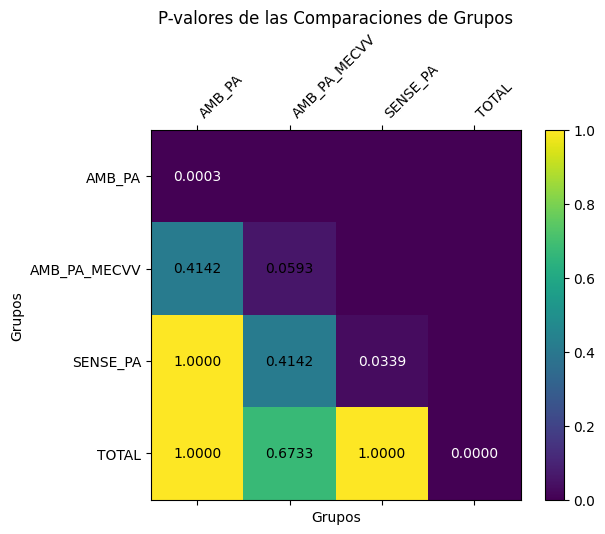

In [19]:
test_indepe_bin_plot({'AMB_PA': AMB_PA['sexe'],'AMB_PA_MECVV': AMB_PA_MECVV['sexe'], 'SENSE_PA': SENSE_PA['sexe'], 'TOTAL': TOTAL['sexe']})

## Admissions

In [20]:
Mitjana_ingresos = AMB_PA['Admissions'].mean()
desviacio_estandard_ingresos = AMB_PA['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 2.18 ± 1.51


In [21]:
Mitjana_ingresos = AMB_PA_MECVV['Admissions'].mean()
desviacio_estandard_ingresos = AMB_PA_MECVV['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 2.50 ± 1.07


In [22]:
Mitjana_ingresos = SENSE_PA['Admissions'].mean()
desviacio_estandard_ingresos = SENSE_PA['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 3.00 ± 1.20


In [23]:
Mitjana_ingresos = TOTAL['Admissions'].mean()
desviacio_estandard_ingresos = TOTAL['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 2.26 ± 1.90


#### Comparació distributiva

##### Normalitat i p-valor

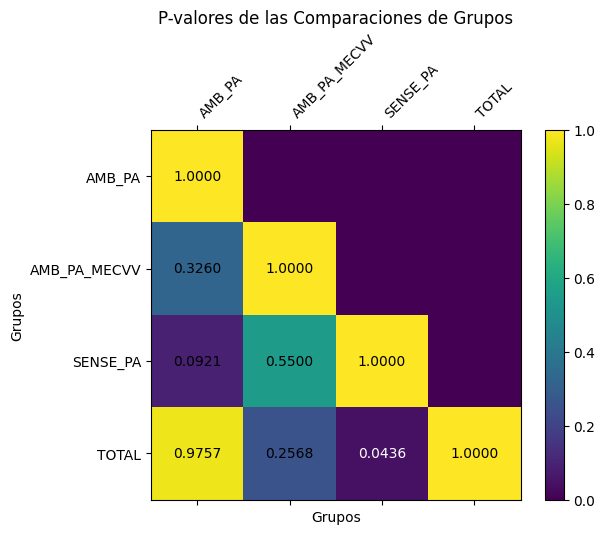

In [24]:
test_indepe_plot({'AMB_PA': AMB_PA['Admissions'], 'AMB_PA_MECVV': AMB_PA_MECVV['Admissions'], 'SENSE_PA': SENSE_PA['Admissions'], 'TOTAL': TOTAL['Admissions']})

## Urgències

In [25]:
Mitjana_urgencies = AMB_PA['Emergències'].mean()
desviacio_estandard_urgencies = AMB_PA['Emergències'].std()

resultat = f"{Mitjana_urgencies:.2f} ± {desviacio_estandard_urgencies:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'urgències:", resultat)

Mitjana ± Desviació Estàndard del nombre d'urgències: 3.41 ± 2.12


## Disfàgia

In [26]:
disf_AMB_PA= (AMB_PA['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_AMB_PA:.2f}%")

Percentatge de disfàgia: 47.06%


In [27]:
disf_AMB_PA_MECVV = (AMB_PA_MECVV['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_AMB_PA_MECVV:.2f}%")

Percentatge de disfàgia: 50.00%


In [28]:
disf_SENSE_PA= (SENSE_PA['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_SENSE_PA:.2f}%")

Percentatge de disfàgia: 25.00%


In [29]:
disf_TOTAL= (TOTAL['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_TOTAL:.2f}%")

Percentatge de disfàgia: 20.00%


#### Comparació distributiva

##### Normalitat i p-valor

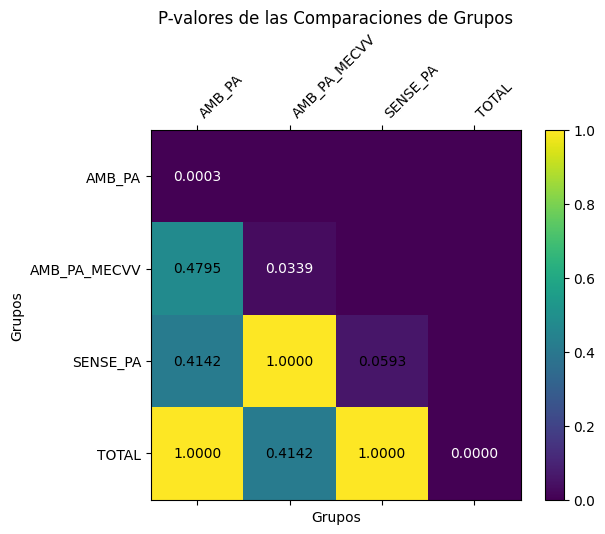

In [30]:
test_indepe_bin_plot({'AMB_PA': AMB_PA['DO diagnosticada'], 'AMB_PA_MECVV': AMB_PA_MECVV['DO diagnosticada'], 'SENSE_PA': SENSE_PA['DO diagnosticada'], 'TOTAL': TOTAL['DO diagnosticada']})

Al ser una variable categòrica no té sentit comprovar la seva normalitat. Realitzaré directament el test Xi-quadrat

## Index de Barthel

### Mitjana

In [31]:
Mitjana_barthel = AMB_PA['Barthel resultats'].mean()
desviacio_estandard_barthel = AMB_PA['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

Mitjana ± Desviació Estàndard del Barthel: 22.65 ± 24.63


In [32]:
Mitjana_barthel = AMB_PA_MECVV['Barthel resultats'].mean()
desviacio_estandard_barthel = AMB_PA_MECVV['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

Mitjana ± Desviació Estàndard del Barthel: 13.75 ± 18.27


In [33]:
Mitjana_barthel = SENSE_PA['Barthel resultats'].mean()
desviacio_estandard_barthel = SENSE_PA['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

Mitjana ± Desviació Estàndard del Barthel: 53.12 ± 21.20


#### Comparació distributiva

##### Normalitat i p-valor

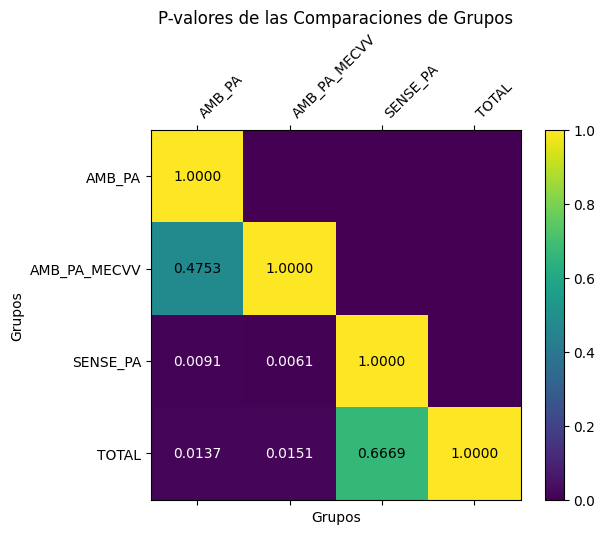

In [34]:
test_indepe_plot({'AMB_PA': AMB_PA['Barthel resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Barthel resultats'], 'SENSE_PA': SENSE_PA['Barthel resultats'], 'TOTAL': TOTAL['Barthel resultats']})

NORMALITAT: Només el tercer grup (SENSE_PA) segueix una distribució normal

### Valors de dependència

##### AMB_PA

In [35]:
indepe_AMB_PA = (AMB_PA['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_AMB_PA: {indepe_AMB_PA:.2f}%")

Percentatge de indepe_AMB_PA: 0.00%


In [36]:
mod_AMB_PA = (AMB_PA['Barthel resultats'].between(61, 95)).mean() * 100
print(f"Percentatge de mod_AMB_PA: {mod_AMB_PA:.2f}%")

Percentatge de mod_AMB_PA: 5.88%


In [37]:
sev_AMB_PA = (AMB_PA['Barthel resultats'].between(21, 60)).mean() * 100
print(f"Percentatge de sev_AMB_PA: {sev_AMB_PA:.2f}%")

Percentatge de sev_AMB_PA: 41.18%


In [38]:
total_AMB_PA = (AMB_PA['Barthel resultats'] <= 20.0 ).mean() * 100
print(f"Percentatge de total_AMB_PA: {total_AMB_PA:.2f}%")

Percentatge de total_AMB_PA: 52.94%


##### AMB_PA_MECVV

In [39]:
indepe_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_AMB_PA_MECVV: {indepe_AMB_PA_MECVV:.2f}%")

Percentatge de indepe_AMB_PA_MECVV: 0.00%


In [40]:
mod_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'].between(61,95)).mean() * 100
print(f"Percentatge de mod_AMB_PA_MECVV: {mod_AMB_PA_MECVV:.2f}%")

Percentatge de mod_AMB_PA_MECVV: 0.00%


In [41]:
sev_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'].between(21,60)).mean() * 100
print(f"Percentatge de sev_AMB_PA_MECVV: {sev_AMB_PA_MECVV:.2f}%")

Percentatge de sev_AMB_PA_MECVV: 25.00%


In [42]:
total_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'] <= 20.0).mean() * 100
print(f"Percentatge de total_AMB_PA_MECVV: {total_AMB_PA_MECVV:.2f}%")

Percentatge de total_AMB_PA_MECVV: 75.00%


##### SENSE_PA

In [43]:
indepe_SENSE_PA = (SENSE_PA['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_SENSE_PA: {indepe_SENSE_PA:.2f}%")

Percentatge de indepe_SENSE_PA: 0.00%


In [44]:
mod_SENSE_PA = (SENSE_PA['Barthel resultats'].between(61,95)).mean() * 100
print(f"Percentatge de mod_SENSE_PA: {mod_SENSE_PA:.2f}%")

Percentatge de mod_SENSE_PA: 37.50%


In [45]:
sev_SENSE_PA = (SENSE_PA['Barthel resultats'].between(21,60)).mean() * 100
print(f"Percentatge de sev_SENSE_PA: {sev_SENSE_PA:.2f}%")

Percentatge de sev_SENSE_PA: 62.50%


In [46]:
total_SENSE_PA = (SENSE_PA['Barthel resultats'] <= 20).mean() * 100
print(f"Percentatge de total_SENSE_PA: {total_SENSE_PA:.2f}%")

Percentatge de total_SENSE_PA: 0.00%


#### P-valor

##### Independència

In [47]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=AMB_PA_MECVV['Barthel resultats'] == 100.0)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 0.0
P-valor entre AMB_PA i AMB_PA_MECVV: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [48]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=SENSE_PA['Barthel resultats'] == 100.0)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.0
P-valor entre AMB_PA i SENSE_PA: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [49]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] == 100.0, columns=SENSE_PA['Barthel resultats'] == 100.0)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [50]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 0.0
P-valor entre AMB_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [51]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVVV i TOTAL: 0.0
P-valor entre AMB_PA_MECVV i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [52]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


##### Moderada

In [53]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=AMB_PA_MECVV['Barthel resultats'].between(61, 95))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 0.0
P-valor entre AMB_PA i AMB_PA_MECVV: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [54]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=SENSE_PA['Barthel resultats'].between(61, 95))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.1875
P-valor entre AMB_PA i SENSE_PA: 0.6650055421020291
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [55]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(61, 95), columns=SENSE_PA['Barthel resultats'].between(61, 95))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [56]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 3.7353515625
P-valor entre AMB_PA i TOTAL: 0.053272454982386926
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [57]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 0.0
P-valor entre AMB_PA_MECVV i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [58]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 4.302222222222222
P-valor entre SENSE_PA i TOTAL: 0.0380626070324449
Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


##### Severa

In [59]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=AMB_PA_MECVV['Barthel resultats'].between(21,60))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 2.34375
P-valor entre AMB_PA i AMB_PA_MECVV: 0.12578642463893994
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [60]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=SENSE_PA['Barthel resultats'].between(21,60))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.1875
P-valor entre AMB_PA i SENSE_PA: 0.6650055421020291
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [61]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(21,60), columns=SENSE_PA['Barthel resultats'].between(21,60))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [62]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 13.122091836734691
P-valor entre AMB_PA i TOTAL: 0.0002918340067889046
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [63]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 3.5555555555555554
P-valor entre AMB_PA_MECVV i TOTAL: 0.05934643879191998
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [64]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 4.302222222222222
P-valor entre SENSE_PA i TOTAL: 0.0380626070324449
Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


##### Total

In [65]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=AMB_PA_MECVV['Barthel resultats'] <= 20.0)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 2.34375
P-valor entre AMB_PA i AMB_PA_MECVV: 0.12578642463893994
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [66]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=SENSE_PA['Barthel resultats'] <= 20.0)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.0
P-valor entre AMB_PA i SENSE_PA: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [67]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] <= 20.0, columns=SENSE_PA['Barthel resultats'] <= 20.0)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [68]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 13.223042052469136
P-valor entre AMB_PA i TOTAL: 0.00027652843917458906
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [69]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 3.5555555555555554
P-valor entre AMB_PA_MECVV i TOTAL: 0.05934643879191998
No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [70]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


## Index del MNA

Primer convertiré la columna a tipus numèric ja que els valors que conté són de tipus objecte i amb aquest tipus no puc calcular la mitjana ni la desviació estàndard.

In [71]:
AMB_PA.loc[:, 'MNA resultats'] = pd.to_numeric(AMB_PA['MNA resultats'], errors='coerce')
AMB_PA_MECVV.loc[:, 'MNA resultats'] = pd.to_numeric(AMB_PA_MECVV['MNA resultats'], errors='coerce')
SENSE_PA.loc[:, 'MNA resultats'] = pd.to_numeric(SENSE_PA['MNA resultats'], errors='coerce')
TOTAL.loc[:, 'MNA resultats'] = pd.to_numeric(TOTAL['MNA resultats'], errors='coerce')

### Mitjana

In [72]:
Mitjana_mna = AMB_PA['MNA resultats'].mean()
desviacio_estandard_mna = AMB_PA['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estándard del mna:", resultat)

Mitjana ± Desviació Estándard del mna: 0.00 ± 0.00


In [73]:
Mitjana_mna = AMB_PA_MECVV['MNA resultats'].mean()
desviacio_estandard_mna = AMB_PA_MECVV['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estándard del mna:", resultat)

Mitjana ± Desviació Estándard del mna: 0.00 ± 0.00


In [74]:
Mitjana_mna = SENSE_PA['MNA resultats'].mean()
desviacio_estandard_mna = SENSE_PA['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estàndard del mna:", resultat)

Mitjana ± Desviació Estàndard del mna: 0.00 ± 0.00


In [75]:
Mitjana_mna = TOTAL['MNA resultats'].mean()
desviacio_estandard_mna = TOTAL['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estàndard del mna:", resultat)

Mitjana ± Desviació Estàndard del mna: 4.41 ± 7.20


#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [76]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['MNA resultats'], AMB_PA_MECVV['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

P-valor entre AMB_PA i AMB_PA_MECVV: nan


In [77]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['MNA resultats'], SENSE_PA['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

P-valor entre AMB_PA i SENSE_PA: nan


In [78]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['MNA resultats'], SENSE_PA['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

P-valor entre AMB_PA_MECVV i SENSE_PA: nan


In [79]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

P-valor entre AMB_PA i TOTAL: nan


In [80]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

P-valor entre AMB_PA_MECVV i TOTAL: nan


In [81]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

P-valor entre SENSE_PA i TOTAL: nan


### Valors de malnutrició

##### AMB_PA

In [82]:
norm_AMB_PA = AMB_PA['MNA resultats'].between(24, 30)
Percentatge_norm_AMB_PA = norm_AMB_PA.mean() * 100
num_observaciones_norm_AMB_PA = norm_AMB_PA.sum()

print(f"Percentatge de norm_AMB_PA: {Percentatge_norm_AMB_PA:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA: {num_observaciones_norm_AMB_PA}")

Percentatge de norm_AMB_PA: 0.00%
Nombre d'observacions en norm_AMB_PA: 0


In [83]:
malnutr_AMB_PA = AMB_PA['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_AMB_PA = malnutr_AMB_PA.mean() * 100
num_observacions_malnutr_AMB_PA = norm_AMB_PA.sum()

print(f"Percentatge de malnutr_AMB_PA: {Percentatge_malnutr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA: {num_observacions_malnutr_AMB_PA}")

Percentatge de malnutr_AMB_PA: 0.00%
Nombre d'observacions en norm_AMB_PA: 0


In [84]:
malnut_AMB_PA = AMB_PA['MNA resultats'] < 17
Percentatge_malnut_AMB_PA = malnut_AMB_PA.mean() * 100
num_observacions_malnut_AMB_PA = malnut_AMB_PA.sum()

print(f"Percentatge de malnut_AMB_PA: {Percentatge_malnut_AMB_PA:.2f}%")
print(f"Nombre d'observacions en malnut_AMB_PA: {num_observacions_malnut_AMB_PA}")

Percentatge de malnut_AMB_PA: 23.53%
Nombre d'observacions en malnut_AMB_PA: 4


##### AMB_PA_MECVV

In [85]:
norm_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'].between(24, 30)
Percentatge_norm_AMB_PA_MECVV = norm_AMB_PA_MECVV.mean() * 100
num_observacions_norm_AMB_PA_MECVV = norm_AMB_PA_MECVV.sum()

print(f"Percentatge de norm_AMB_PA_MECVV: {Percentatge_norm_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA_MECVV: {num_observacions_norm_AMB_PA_MECVV}")

Percentatge de norm_AMB_PA_MECVV: 0.00%
Nombre d'observacions en norm_AMB_PA_MECVV: 0


In [86]:
malnutr_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_AMB_PA_MECVV = malnutr_AMB_PA_MECVV.mean() * 100
num_observacions_malnutr_AMB_PA_MECVV = norm_AMB_PA_MECVV.sum()

print(f"Percentatge de malnutr_AMB_PA_MECVV: {Percentatge_malnutr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA_MECVV: {num_observacions_malnutr_AMB_PA_MECVV}")

Percentatge de malnutr_AMB_PA_MECVV: 0.00%
Nombre d'observacions en norm_AMB_PA_MECVV: 0


In [87]:
malnut_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'] < 17
Percentatge_malnut_AMB_PA_MECVV = malnut_AMB_PA_MECVV.mean() * 100
num_observacions_malnut_AMB_PA_MECVV = malnut_AMB_PA_MECVV.sum()

print(f"Percentatge de malnut_AMB_PA_MECVV: {Percentatge_malnut_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en malnut_AMB_PA_MECVV: {num_observacions_malnut_AMB_PA_MECVV}")

Percentatge de malnut_AMB_PA_MECVV: 25.00%
Nombre d'observacions en malnut_AMB_PA_MECVV: 2


##### SENSE_PA

In [88]:
norm_SENSE_PA = SENSE_PA['MNA resultats'].between(24, 30)
Percentatge_norm_SENSE_PA = norm_SENSE_PA.mean() * 100
num_observacions_norm_SENSE_PA = norm_SENSE_PA.sum()

print(f"Percentatge de norm_SENSE_PA: {Percentatge_norm_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en norm_SENSE_PA: {num_observacions_norm_SENSE_PA}")

Percentatge de norm_SENSE_PA: 0.00%
Nombre d'observacions en norm_SENSE_PA: 0


In [89]:
malnutr_SENSE_PA = SENSE_PA['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_SENSE_PA = malnutr_SENSE_PA.mean() * 100
num_observacions_malnutr_SENSE_PA = malnutr_SENSE_PA.sum()

print(f"Percentatge de malnutr_SENSE_PA: {Percentatge_malnutr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en malnutr_SENSE_PA: {num_observacions_malnutr_SENSE_PA}")

Percentatge de malnutr_SENSE_PA: 0.00%
Nombre d'observacions en malnutr_SENSE_PA: 0


In [90]:
malnut_SENSE_PA = SENSE_PA['MNA resultats'] < 17
Percentatge_malnut_SENSE_PA = malnut_SENSE_PA.mean() * 100
num_observacions_malnut_SENSE_PA = malnut_SENSE_PA.sum()

print(f"Percentatge de malnut_SENSE_PA: {Percentatge_malnut_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en malnut_SENSE_PA: {num_observacions_malnut_SENSE_PA}")

Percentatge de malnut_SENSE_PA: 37.50%
Nombre d'observacions en malnut_SENSE_PA: 3


##### TOTAL

In [91]:
norm_TOTAL = TOTAL['MNA resultats'].between(24, 30)
Percentatge_norm_TOTAL = norm_TOTAL.mean() * 100
num_observacions_norm_TOTAL = norm_TOTAL.sum()

print(f"Percentatge de norm_TOTAL: {Percentatge_norm_TOTAL:.2f}%")
print(f"Nombre d'observacions en norm_TOTAL: {num_observacions_norm_TOTAL}")

Percentatge de norm_TOTAL: 0.00%
Nombre d'observacions en norm_TOTAL: 0


In [92]:
malnutr_TOTAL = TOTAL['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_TOTAL = malnutr_TOTAL.mean() * 100
num_observacions_malnutr_TOTAL = malnutr_TOTAL.sum()

print(f"Percentatge de malnutr_TOTAL: {Percentatge_malnutr_TOTAL:.2f}%")
print(f"Nombre d'observacions en malnutr_TOTAL: {num_observacions_malnutr_TOTAL}")

Percentatge de malnutr_TOTAL: 4.00%
Nombre d'observacions en malnutr_TOTAL: 2


In [93]:
malnut_TOTAL = TOTAL['MNA resultats'] < 17
Percentatge_malnut_TOTAL = malnut_TOTAL.mean() * 100
num_observacions_malnut_TOTAL = malnut_TOTAL.sum()

print(f"Percentatge de malnut_TOTAL: {Percentatge_malnut_TOTAL:.2f}%")
print(f"Nombre d'observacions en malnut_TOTAL: {num_observacions_malnut_TOTAL}")

Percentatge de malnut_TOTAL: 18.00%
Nombre d'observacions en malnut_TOTAL: 9


#### P-valor

##### Normal

In [94]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=AMB_PA_MECVV['MNA resultats'].between(24, 30))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 0.0
P-valor entre AMB_PA i AMB_PA_MECVV: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.


In [95]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=SENSE_PA['MNA resultats'].between(24, 30))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.0
P-valor entre AMB_PA i SENSE_PA: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.


In [96]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(24, 30), columns=SENSE_PA['MNA resultats'].between(24, 30))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [97]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 0.0
P-valor entre AMB_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.


In [98]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 0.0
P-valor entre AMB_PA_MECVV i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.


In [99]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.


##### Risc de malnutrició

In [100]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=AMB_PA_MECVV['MNA resultats'].between(17, 23.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 0.0
P-valor entre AMB_PA i AMB_PA_MECVV: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.


In [101]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=SENSE_PA['MNA resultats'].between(17, 23.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.0
P-valor entre AMB_PA i SENSE_PA: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.


In [102]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(17, 23.5), columns=SENSE_PA['MNA resultats'].between(17, 23.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [103]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 0.0
P-valor entre AMB_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.


In [104]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 0.0
P-valor entre AMB_PA_MECVV i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.


In [105]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.


##### Malnutrició

In [106]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=AMB_PA_MECVV['MNA resultats'] < 17)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 2.34375
P-valor entre AMB_PA i AMB_PA_MECVV: 0.12578642463893994
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.


In [107]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=SENSE_PA['MNA resultats'] < 17)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.1875
P-valor entre AMB_PA i SENSE_PA: 0.6650055421020291
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.


In [108]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'] < 17, columns=SENSE_PA['MNA resultats'] < 17)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [109]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 11.89654215976331
P-valor entre AMB_PA i TOTAL: 0.0005623824703676534
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.


In [110]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 3.5555555555555554
P-valor entre AMB_PA_MECVV i TOTAL: 0.05934643879191998
No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.


In [111]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 4.302222222222222
P-valor entre SENSE_PA i TOTAL: 0.0380626070324449
Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.


## Index de l'EMINA

### Mitjana

In [112]:
Mitjana_emina = AMB_PA['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = AMB_PA['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

KeyError: 'EMINA sumatoris comparats'

In [ ]:
Mitjana_emina = AMB_PA_MECVV['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = AMB_PA_MECVV['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = SENSE_PA['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = SENSE_PA['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = TOTAL['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = TOTAL['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [113]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], AMB_PA_MECVV['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

KeyError: 'EMINA sumatoris comparats'

In [114]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], SENSE_PA['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

KeyError: 'EMINA sumatoris comparats'

In [115]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['EMINA sumatoris comparats'], SENSE_PA['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

KeyError: 'EMINA sumatoris comparats'

In [116]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

KeyError: 'EMINA sumatoris comparats'

In [117]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

KeyError: 'EMINA sumatoris comparats'

In [118]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

KeyError: 'EMINA sumatoris comparats'

### Valors EMINA

##### AMB_PA

In [119]:
lowr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_AMB_PA = lowr_AMB_PA.mean() * 100
num_observacions_lowr_AMB_PA = lowr_AMB_PA.sum()

print(f"Percentatge de lowr_AMB_PA: {Percentatge_lowr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en lowr_AMB_PA: {num_observacions_lowr_AMB_PA}")

KeyError: 'EMINA sumatoris comparats'

In [120]:
modr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_AMB_PA = modr_AMB_PA.mean() * 100
num_observacions_modr_AMB_PA = modr_AMB_PA.sum()

print(f"Percentatge de modr_AMB_PA: {Percentatge_modr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en modr_AMB_PA: {num_observacions_modr_AMB_PA}")

KeyError: 'EMINA sumatoris comparats'

In [121]:
highr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_AMB_PA = highr_AMB_PA.mean() * 100
num_observacions_highr_AMB_PA = highr_AMB_PA.sum()

print(f"Percentatge de highr_AMB_PA: {Percentatge_highr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en highr_AMB_PA: {num_observacions_highr_AMB_PA}")

KeyError: 'EMINA sumatoris comparats'

##### AMB_PA_MECVV

In [122]:
lowr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_AMB_PA_MECVV = lowr_AMB_PA_MECVV.mean() * 100
num_observacions_lowr_AMB_PA_MECVV = lowr_AMB_PA_MECVV.sum()

print(f"Percentatge de lowr_AMB_PA_MECVV: {Percentatge_lowr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en lowr_AMB_PA_MECVV: {num_observacions_lowr_AMB_PA_MECVV}")

KeyError: 'EMINA sumatoris comparats'

In [123]:
modr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_AMB_PA_MECVV = modr_AMB_PA_MECVV.mean() * 100
num_observacions_modr_AMB_PA_MECVV = modr_AMB_PA_MECVV.sum()

print(f"Percentatge de modr_AMB_PA_MECVV: {Percentatge_modr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en modr_AMB_PA_MECVV: {num_observacions_modr_AMB_PA_MECVV}")

KeyError: 'EMINA sumatoris comparats'

In [124]:
highr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_AMB_PA_MECVV = highr_AMB_PA_MECVV.mean() * 100
num_observacions_highr_AMB_PA_MECVV = highr_AMB_PA_MECVV.sum()

print(f"Percentatge de highr_AMB_PA_MECVV: {Percentatge_highr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en highr_AMB_PA_MECVV: {num_observacions_highr_AMB_PA_MECVV}")

KeyError: 'EMINA sumatoris comparats'

##### SENSE_PA

In [125]:
lowr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_SENSE_PA = lowr_SENSE_PA.mean() * 100
num_observacions_lowr_SENSE_PA = lowr_SENSE_PA.sum()

print(f"Percentatge de lowr_SENSE_PA: {Percentatge_lowr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en lowr_SENSE_PA: {num_observacions_lowr_SENSE_PA}")

KeyError: 'EMINA sumatoris comparats'

In [126]:
modr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_SENSE_PA = modr_SENSE_PA.mean() * 100
num_observacions_modr_SENSE_PA = modr_SENSE_PA.sum()

print(f"Percentatge de modr_SENSE_PA: {Percentatge_modr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en modr_SENSE_PA: {num_observacions_modr_SENSE_PA}")

KeyError: 'EMINA sumatoris comparats'

In [127]:
highr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_SENSE_PA = highr_SENSE_PA.mean() * 100
num_observacions_highr_SENSE_PA = highr_SENSE_PA.sum()

print(f"Percentatge de highr_SENSE_PA: {Percentatge_highr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en highr_SENSE_PA: {num_observacions_highr_SENSE_PA}")

KeyError: 'EMINA sumatoris comparats'

##### TOTAL

In [128]:
lowr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_TOTAL = lowr_TOTAL.mean() * 100
num_observacions_lowr_TOTAL = lowr_TOTAL.sum()

print(f"Percentatge de lowr_TOTAL: {Percentatge_lowr_TOTAL:.2f}%")
print(f"Nombre d'observacions en lowr_TOTAL: {num_observacions_lowr_TOTAL}")

KeyError: 'EMINA sumatoris comparats'

In [129]:
modr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_TOTAL = modr_TOTAL.mean() * 100
num_observacions_modr_TOTAL = modr_TOTAL.sum()

print(f"Percentatge de modr_TOTAL: {Percentatge_modr_TOTAL:.2f}%")
print(f"Nombre d'observacions en modr_TOTAL: {num_observacions_modr_TOTAL}")

KeyError: 'EMINA sumatoris comparats'

In [130]:
highr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_TOTAL = highr_TOTAL.mean() * 100
num_observacions_highr_TOTAL = highr_TOTAL.sum()

print(f"Percentatge de highr_TOTAL: {Percentatge_highr_TOTAL:.2f}%")
print(f"Nombre d'observacions en highr_TOTAL: {num_observacions_highr_TOTAL}")

KeyError: 'EMINA sumatoris comparats'

#### P-valor

##### Risc baix

In [131]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

KeyError: 'EMINA sumatoris comparats'

In [132]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=SENSE_PA['EMINA sumatoris comparats'].between(0,5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [133]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5), columns=SENSE_PA['EMINA sumatoris comparats'].between(0,5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [134]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [135]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [136]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

##### Risc moderat

In [137]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

KeyError: 'EMINA sumatoris comparats'

In [138]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=SENSE_PA['EMINA sumatoris comparats'].between(6,10))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [139]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10), columns=SENSE_PA['EMINA sumatoris comparats'].between(6,10))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [140]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [141]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [142]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

##### Risc alt

In [143]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

KeyError: 'EMINA sumatoris comparats'

In [144]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=SENSE_PA['EMINA sumatoris comparats'].between(11,15))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [145]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15), columns=SENSE_PA['EMINA sumatoris comparats'].between(11,15))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [146]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [147]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [148]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

## Index de la canadenca (escala neurològica canadenca)

### Mitjana

In [149]:
Mitjana_canad = AMB_PA['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = AMB_PA['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

In [150]:
Mitjana_canad = AMB_PA_MECVV['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = AMB_PA_MECVV['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

In [151]:
Mitjana_canad = SENSE_PA['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = SENSE_PA['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

In [152]:
Mitjana_canad = TOTAL['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = TOTAL['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [153]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], AMB_PA_MECVV['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

KeyError: 'Canadenca sumatoris comparats'

In [154]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], SENSE_PA['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

KeyError: 'Canadenca sumatoris comparats'

In [155]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['Canadenca sumatoris comparats'], SENSE_PA['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

KeyError: 'Canadenca sumatoris comparats'

In [156]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

KeyError: 'Canadenca sumatoris comparats'

In [157]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

KeyError: 'Canadenca sumatoris comparats'

In [158]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

KeyError: 'Canadenca sumatoris comparats'

### Valors canadenca

##### AMB_PA 

In [159]:
mild_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_AMB_PA = mild_AMB_PA.mean() * 100
num_observacions_mild_AMB_PA = mild_AMB_PA.sum()

print(f"Percentatge de mild_AMB_PA: {Percentatge_mild_AMB_PA:.2f}%")
print(f"Nombre d'observacions en mild_AMB_PA: {num_observacions_mild_AMB_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [160]:
modneu_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_AMB_PA = modneu_AMB_PA.mean() * 100
num_observacions_modneu_AMB_PA = modneu_AMB_PA.sum()

print(f"Percentatge de modneu_AMB_PA: {Percentatge_modneu_AMB_PA:.2f}%")
print(f"Nombre d'observacions en modneu_AMB_PA: {num_observacions_modneu_AMB_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [161]:
sevneu_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_AMB_PA = sevneu_AMB_PA.mean() * 100
num_observacions_sevneu_AMB_PA = sevneu_AMB_PA.sum()

print(f"Percentatge de sevneu_AMB_PA: {Percentatge_sevneu_AMB_PA:.2f}%")
print(f"Nombre d'observacions en sevneu_AMB_PA: {num_observacions_sevneu_AMB_PA}")

KeyError: 'Canadenca sumatoris comparats'

##### AMB_PA_MECVV

In [162]:
mild_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_AMB_PA_MECVV = mild_AMB_PA_MECVV.mean() * 100
num_observacions_mild_AMB_PA_MECVV = mild_AMB_PA_MECVV.sum()

print(f"Percentatge de mild_AMB_PA_MECVV: {Percentatge_mild_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en mild_AMB_PA_MECVV: {num_observacions_mild_AMB_PA_MECVV}")

KeyError: 'Canadenca sumatoris comparats'

In [163]:
modneu_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_AMB_PA_MECVV = modneu_AMB_PA_MECVV.mean() * 100
num_observacions_modneu_AMB_PA_MECVV = modneu_AMB_PA_MECVV.sum()

print(f"Percentatge de modneu_AMB_PA_MECVV: {Percentatge_modneu_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en modneu_AMB_PA_MECVV: {num_observacions_modneu_AMB_PA_MECVV}")

KeyError: 'Canadenca sumatoris comparats'

In [164]:
sevneu_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_AMB_PA_MECVV = sevneu_AMB_PA_MECVV.mean() * 100
num_observacions_sevneu_AMB_PA_MECVV = sevneu_AMB_PA_MECVV.sum()

print(f"Percentatge de sevneu_AMB_PA_MECVV: {Percentatge_sevneu_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en sevneu_AMB_PA_MECVV: {num_observacions_sevneu_AMB_PA_MECVV}")

KeyError: 'Canadenca sumatoris comparats'

##### SENSE_PA

In [165]:
mild_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_SENSE_PA = mild_SENSE_PA.mean() * 100
num_observacions_mild_SENSE_PA = mild_SENSE_PA.sum()

print(f"Percentatge de mild_SENSE_PA: {Percentatge_mild_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en mild_SENSE_PA: {num_observacions_mild_SENSE_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [166]:
modneu_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_SENSE_PA = modneu_SENSE_PA.mean() * 100
num_observacions_modneu_SENSE_PA = modneu_SENSE_PA.sum()

print(f"Percentatge de modneu_SENSE_PA: {Percentatge_modneu_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en modneu_SENSE_PA: {num_observacions_modneu_SENSE_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [167]:
sevneu_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_SENSE_PA = sevneu_SENSE_PA.mean() * 100
num_observacions_sevneu_SENSE_PA = sevneu_SENSE_PA.sum()

print(f"Percentatge de sevneu_SENSE_PA: {Percentatge_sevneu_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en sevneu_SENSE_PA: {num_observacions_sevneu_SENSE_PA}")

KeyError: 'Canadenca sumatoris comparats'

##### TOTAL

In [168]:
mild_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_TOTAL = mild_TOTAL.mean() * 100
num_observacions_mild_TOTAL = mild_TOTAL.sum()

print(f"Percentatge de mild_TOTAL: {Percentatge_mild_TOTAL:.2f}%")
print(f"Nombre d'observacions en mild_TOTAL: {num_observacions_mild_TOTAL}")

KeyError: 'Canadenca sumatoris comparats'

In [169]:
modneu_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_TOTAL = modneu_TOTAL.mean() * 100
num_observacions_modneu_TOTAL = modneu_TOTAL.sum()

print(f"Percentatge de modneu_TOTAL: {Percentatge_modneu_TOTAL:.2f}%")
print(f"Nombre d'observacions en modneu_TOTAL: {num_observacions_modneu_TOTAL}")

KeyError: 'Canadenca sumatoris comparats'

In [170]:
sevneu_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_TOTAL = sevneu_TOTAL.mean() * 100
num_observacions_sevneu_TOTAL = sevneu_TOTAL.sum()

print(f"Percentatge de sevneu_TOTAL: {Percentatge_sevneu_TOTAL:.2f}%")
print(f"Nombre d'observacions en sevneu_TOTAL: {num_observacions_sevneu_TOTAL}")

KeyError: 'Canadenca sumatoris comparats'

#### P-valor

##### Dèficit neurològic lleuger (mild)

In [171]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")


KeyError: 'Canadenca sumatoris comparats'

In [172]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [173]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [174]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [175]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [176]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

##### Dèficit neurològic moderat

In [177]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")

KeyError: 'Canadenca sumatoris comparats'

In [178]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=SENSE_PA['Canadenca sumatoris comparats'].between(5,10))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [179]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10), columns=SENSE_PA['Canadenca sumatoris comparats'].between(5,10))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [180]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [181]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [182]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

##### Dèficit neurològic greu (sever)

In [183]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")

KeyError: 'Canadenca sumatoris comparats'

In [184]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [185]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [186]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [187]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [188]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

## Infeccions respiratòries

##### AMB_PA 

In [189]:
mainresp_AMB_PA= (AMB_PA['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_AMB_PA:.2f}%")

Percentatge de infeccions respiratòries principals : 41.18%


In [190]:
LRTI_AMB_PA= (AMB_PA['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_AMB_PA:.2f}%")

Percentatge de LRTI: 17.65%


In [191]:
COPD_AMB_PA= (AMB_PA['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_AMB_PA:.2f}%")

Percentatge de exacerbacions de COPD: 29.41%


In [192]:
fibro_AMB_PA= (AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_AMB_PA:.2f}%")

Percentatge de fibrosi pulmonar i fibrotòrax: 0.00%


##### AMB_PA_MECVV

In [193]:
mainresp_AMB_PA_MECVV= (AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_AMB_PA_MECVV:.2f}%")

Percentatge de infeccions respiratòries principals : 50.00%


In [194]:
LRTI_AMB_PA_MECVV= (AMB_PA_MECVV['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_AMB_PA_MECVV:.2f}%")

Percentatge de LRTI: 12.50%


In [195]:
COPD_AMB_PA_MECVV = (AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_AMB_PA_MECVV:.2f}%")

Percentatge de exacerbacions de COPD: 50.00%


In [196]:
fibro_AMB_PA_MECVV = (AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_AMB_PA_MECVV:.2f}%")

Percentatge de fibrosi pulmonar i fibrotòrax: 0.00%


##### SENSE_PA

In [197]:
mainresp_SENSE_PA= (SENSE_PA['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_SENSE_PA:.2f}%")

Percentatge de infeccions respiratòries principals : 50.00%


In [198]:
LRTI_SENSE_PA= (SENSE_PA['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_SENSE_PA:.2f}%")

Percentatge de LRTI: 25.00%


In [199]:
COPD_SENSE_PA= (SENSE_PA['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_SENSE_PA:.2f}%")

Percentatge de exacerbacions de COPD: 25.00%


In [200]:
fibro_SENSE_PA= (SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_SENSE_PA:.2f}%")

Percentatge de fibrosi pulmonar i fibrotòrax: 0.00%


#### Comparació distributiva

##### Normalitat i p-valor

No cal calcular la normalitat ja que totes són variables categòriques

##### Infeccions respiratòries principals

In [201]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 2.34375
P-valor entre AMB_PA i AMB_PA_MECVV: 0.12578642463893994
No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.


In [202]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=SENSE_PA['Infeccions respiratòries principals diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.1875
P-valor entre AMB_PA i SENSE_PA: 0.6650055421020291
No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.


In [203]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'], columns=SENSE_PA['Infeccions respiratòries principals diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")

ValueError: No data; `observed` has size 0.

In [204]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_14)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 13.122091836734691
P-valor entre AMB_PA i AMB_PA_MECVV: 0.0002918340067889046
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.


In [205]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 4.5
P-valor entre AMB_PA_MECVV i TOTAL: 0.033894853524689295
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.


In [206]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_34, p_value_34, dof_4, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre AMB_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 4.5
P-valor entre AMB_PA i TOTAL: 0.033894853524689295
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.


##### LRTI

In [207]:
contingency_table_12 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=AMB_PA_MECVV['LRTI diagnosticada'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 0.9600000000000002
P-valor entre AMB_PA i AMB_PA_MECVV: 0.32718687779030275
No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.


In [208]:
contingency_table_13 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=SENSE_PA['LRTI diagnosticada'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.1875
P-valor entre AMB_PA i SENSE_PA: 0.6650055421020291
No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.


In [209]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['LRTI diagnosticada'], columns=SENSE_PA['LRTI diagnosticada'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [210]:
contingency_table_14 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 10.815334467120184
P-valor entre AMB_PA i TOTAL: 0.0010066283741798992
Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.


In [211]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 1.469387755102041
P-valor entre AMB_PA_MECVV i TOTAL: 0.22544231699450956
No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.


In [212]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SNESE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 3.5555555555555554
P-valor entre SNESE_PA i TOTAL: 0.05934643879191998
No hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.


##### Exacerbacions de COPD

In [213]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 2.34375
P-valor entre AMB_PA i AMB_PA_MECVV: 0.12578642463893994
No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECVV.


In [214]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=SENSE_PA['Exacerbacions de COPD diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.0
P-valor entre AMB_PA i SENSE_PA: 1.0
No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.


In [215]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'], columns=SENSE_PA['Exacerbacions de COPD diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [216]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 12.524513888888887
P-valor entre AMB_PA i TOTAL: 0.00040164738150225485
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.


In [217]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 4.5
P-valor entre AMB_PA_MECVV i TOTAL: 0.033894853524689295
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.


In [218]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 3.5555555555555554
P-valor entre SENSE_PA i TOTAL: 0.05934643879191998
No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.


##### Fibrosi pulmonar i fibrotòrax

In [219]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 0.0
P-valor entre AMB_PA i AMB_PA_MECVV: 1.0
No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.


In [220]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 0.0
P-valor entre AMB_PA i SENSE_PA: 1.0
No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.


In [221]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [222]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 0.0
P-valor entre AMB_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.


In [223]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 0.0
P-valor entre AMB_PA_MECVV i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.


In [224]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.


## Resultats de laboratori

Les columnes generades a partir d'aquests resultats contenen valors tipus objecte, per tant, primer els transformaré a tipus numèric per poder realitzar les operacions que neccessitaré fer.

### Albúmina

In [225]:
AMB_PA.loc[:, 'Albúmina'] = pd.to_numeric(AMB_PA['Albúmina'], errors='coerce').dropna()

Mitjana_alb = AMB_PA['Albúmina'].mean()
desviacio_estandard_alb = AMB_PA['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

In [226]:
AMB_PA_MECVV.loc[:, 'Albúmina'] = pd.to_numeric(AMB_PA_MECVV['Albúmina'], errors='coerce').dropna()

Mitjana_alb = AMB_PA_MECVV['Albúmina'].mean()
desviacio_estandard_alb = AMB_PA_MECVV['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

In [227]:
SENSE_PA.loc[:, 'Albúmina'] = pd.to_numeric(SENSE_PA['Albúmina'], errors='coerce').dropna()

Mitjana_alb = SENSE_PA['Albúmina'].mean()
desviacio_estandard_alb = SENSE_PA['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

In [228]:
TOTAL.loc[:, 'Albúmina'] = pd.to_numeric(TOTAL['Albúmina'], errors='coerce').dropna()

Mitjana_alb = TOTAL['Albúmina'].mean()
desviacio_estandard_alb = TOTAL['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

#### Comparació distributiva

##### Normalitat i p-valor

In [229]:
test_indepe_plot({'AMB_PA': AMB_PA['Albumin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Albumin'], 'SENSE_PA': SENSE_PA['Albumin'], 'TOTAL': TOTAL['Albumin']})

ValueError: could not convert string to float: 'Extracció no realitzada '

NORMALITAT: Els 4 grups segueixen una distribució normal

### Proteïnes totals

In [230]:
AMB_PA.loc[:, 'Proteïnes totals'] = pd.to_numeric(AMB_PA['Proteïnes totals'], errors='coerce')

Mitjana_prot = AMB_PA['Proteïnes totals'].mean()
desviacio_estandard_prot = AMB_PA['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

In [231]:
AMB_PA_MECVV.loc[:, 'Proteïnes totals'] = pd.to_numeric(AMB_PA_MECVV['Proteïnes totals'], errors='coerce')

Mitjana_prot = AMB_PA_MECVV['Proteïnes totals'].mean()
desviacio_estandard_prot = AMB_PA_MECVV['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

In [232]:
SENSE_PA.loc[:, 'Proteïnes totals'] = pd.to_numeric(SENSE_PA['Proteïnes totals'], errors='coerce')

Mitjana_prot = SENSE_PA['Proteïnes totals'].mean()
desviacio_estandard_prot = SENSE_PA['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

In [233]:
TOTAL.loc[:, 'Proteïnes totals'] = pd.to_numeric(TOTAL['Proteïnes totals'], errors='coerce')

Mitjana_prot = TOTAL['Proteïnes totals'].mean()
desviacio_estandard_prot = TOTAL['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

#### Comparació distributiva

##### Normalitat i p-valor

In [234]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Proteins'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Proteins'], 'SENSE_PA': SENSE_PA['Total Proteins'], 'TOTAL': TOTAL['Total Proteins']})

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

NORMALITAT: Els 4 grups segueixen una distribució normal

### Hemoglobina

In [235]:
AMB_PA.loc[:, 'Hb'] = pd.to_numeric(AMB_PA['Hb'], errors='coerce')

Mitjana_hb = AMB_PA['Hb'].mean()
desviacio_estandard_hb = AMB_PA['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

KeyError: 'Hb'

In [236]:
AMB_PA_MECVV.loc[:, 'Hb'] = pd.to_numeric(AMB_PA_MECVV['Hb'], errors='coerce')

Mitjana_hb = AMB_PA_MECVV['Hb'].mean()
desviacio_estandard_hb = AMB_PA_MECVV['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

KeyError: 'Hb'

In [237]:
SENSE_PA.loc[:, 'Hb'] = pd.to_numeric(SENSE_PA['Hb'], errors='coerce')

Mitjana_hb = SENSE_PA['Hb'].mean()
desviacio_estandard_hb = SENSE_PA['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

KeyError: 'Hb'

In [238]:
TOTAL.loc[:, 'Hb'] = pd.to_numeric(TOTAL['Hb'], errors='coerce')

Mitjana_hb = TOTAL['Hb'].mean()
desviacio_estandard_hb = TOTAL['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de la hemoglobina:", resultat)

KeyError: 'Hb'

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Els 4 grups segueixen una distribució normal

In [239]:
test_indepe_plot({'AMB_PA': AMB_PA['Hemoglobin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Hemoglobin'], 'SENSE_PA': SENSE_PA['Hemoglobin'], 'TOTAL': TOTAL['Hemoglobin']})

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

### Colesterol 

In [240]:
AMB_PA.loc[:, 'Colesterol total'] = pd.to_numeric(AMB_PA['Colesterol total'], errors='coerce')

Mitjana_col = AMB_PA['Colesterol total'].mean()
desviacio_estandard_col = AMB_PA['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

In [241]:
AMB_PA_MECVV.loc[:, 'Colesterol total'] = pd.to_numeric(AMB_PA_MECVV['Colesterol total'], errors='coerce')

Mitjana_col = AMB_PA_MECVV['Colesterol total'].mean()
desviacio_estandard_col = AMB_PA_MECVV['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

In [242]:
SENSE_PA.loc[:, 'Colesterol total'] = pd.to_numeric(SENSE_PA['Colesterol total'], errors='coerce')

Mitjana_col = SENSE_PA['Colesterol total'].mean()
desviacio_estandard_col = SENSE_PA['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

In [243]:
TOTAL.loc[:, 'Colesterol total'] = pd.to_numeric(TOTAL['Colesterol total'], errors='coerce')

Mitjana_col = TOTAL['Colesterol total'].mean()
desviacio_estandard_col = TOTAL['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

#### Comparació distributiva

##### Normalitat i p-valor



In [244]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Cholesterol'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Cholesterol'], 'SENSE_PA': SENSE_PA['Total Cholesterol'], 'TOTAL': TOTAL['Total Cholesterol']})

ValueError: could not convert string to float: 'Extracció no realitzada '

NORMALITAT: Els 4 grups segueixen una distribució normal

### Leucòcits

In [245]:
AMB_PA.loc[:, 'Leucos'] = pd.to_numeric(AMB_PA['Leucos'], errors='coerce')

Mitjana_leu = AMB_PA['Leucos'].mean()
desviacio_estandard_leu = AMB_PA['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

In [246]:
AMB_PA_MECVV.loc[:, 'Leucos'] = pd.to_numeric(AMB_PA_MECVV['Leucos'], errors='coerce')

Mitjana_leu = AMB_PA_MECVV['Leucos'].mean()
desviacio_estandard_leu = AMB_PA_MECVV['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

In [247]:
SENSE_PA.loc[:, 'Leucos'] = pd.to_numeric(SENSE_PA['Leucos'], errors='coerce')

Mitjana_leu = SENSE_PA['Leucos'].mean()
desviacio_estandard_leu = SENSE_PA['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

In [248]:
TOTAL.loc[:, 'Leucos'] = pd.to_numeric(TOTAL['Leucos'], errors='coerce')

Mitjana_leu = TOTAL['Leucos'].mean()
desviacio_estandard_leu = TOTAL['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

#### Comparació distributiva

##### Normalitat i p-valor

In [249]:
test_indepe_plot({'AMB_PA': AMB_PA['Leucocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Leucocytes'], 'SENSE_PA': SENSE_PA['Leucocytes'], 'TOTAL': TOTAL['Leucocytes']})

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

NORMALITAT: Els 4 grups segueixen una distribució normal

### Limfòcits %

In [250]:
AMB_PA.loc[:, 'Limfos'] = pd.to_numeric(AMB_PA['Limfos'], errors='coerce')

Mitjana_limf = AMB_PA['Limfos'].mean()
desviacio_estandard_limf = AMB_PA['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

In [251]:
AMB_PA_MECVV.loc[:, 'Limfos'] = pd.to_numeric(AMB_PA_MECVV['Limfos'], errors='coerce')

Mitjana_limf = AMB_PA_MECVV['Limfos'].mean()
desviacio_estandard_limf = AMB_PA_MECVV['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

In [252]:
SENSE_PA.loc[:, 'Limfos'] = pd.to_numeric(SENSE_PA['Limfos'], errors='coerce')

Mitjana_limf = SENSE_PA['Limfos'].mean()
desviacio_estandard_limf = SENSE_PA['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

In [253]:
TOTAL.loc[:, 'Limfos'] = pd.to_numeric(TOTAL['Limfos'], errors='coerce')

Mitjana_limf = TOTAL['Limfos'].mean()
desviacio_estandard_limf = TOTAL['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

#### Comparació distributiva

##### Normalitat i p-valor

In [254]:
test_indepe_plot({'AMB_PA': AMB_PA['Lymphocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Lymphocytes'], 'SENSE_PA': SENSE_PA['Lymphocytes'], TOTAL: TOTAL['Lymphocytes']})

TypeError: unhashable type: 'DataFrame'

NORMALITAT: Tots els grups, menys el primer (AMB_PA), segueixen una distribució normal

### Proteïna C Reactiva

In [255]:
AMB_PA.loc[:, 'Prot C react'] = pd.to_numeric(AMB_PA['Prot C react'], errors='coerce')

Mitjana_protcr = AMB_PA['Prot C react'].mean()
desviacio_estandard_protcr = AMB_PA['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

In [256]:
AMB_PA_MECVV.loc[:, 'Prot C react'] = pd.to_numeric(AMB_PA_MECVV['Prot C react'], errors='coerce')

Mitjana_protcr = AMB_PA_MECVV['Prot C react'].mean()
desviacio_estandard_protcr = AMB_PA_MECVV['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

In [257]:
SENSE_PA.loc[:, 'Prot C react'] = pd.to_numeric(SENSE_PA['Prot C react'], errors='coerce')

Mitjana_protcr = SENSE_PA['Prot C react'].mean()
desviacio_estandard_protcr = SENSE_PA['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

In [258]:
TOTAL.loc[:, 'Prot C react'] = pd.to_numeric(TOTAL['Prot C react'], errors='coerce')

Mitjana_protcr = TOTAL['Prot C react'].mean()
desviacio_estandard_protcr = TOTAL['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

#### Comparació distributiva

##### Normalitat i p-valor

In [259]:
test_indepe_plot({'AMB_PA': AMB_PA['C reactive protein'], 'AMB_PA_MECVV': AMB_PA_MECVV['C reactive protein'], 'SENSE_PA': SENSE_PA['C reactive protein'], 'TOTAL': TOTAL['C reactive protein']})

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

NORMALITAT: Tots els grups, menys el quart (TOTAL), segueixen una distribució normal

### Urea 

In [260]:
AMB_PA.loc[:, 'Urea'] = pd.to_numeric(AMB_PA['Urea'], errors='coerce')

Mitjana_Urea = AMB_PA['Urea'].mean()
desviacio_estandard_Urea = AMB_PA['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 62.17 ± 36.37


In [261]:
AMB_PA_MECVV.loc[:, 'Urea'] = pd.to_numeric(AMB_PA_MECVV['Urea'], errors='coerce')

Mitjana_Urea = AMB_PA_MECVV['Urea'].mean()
desviacio_estandard_Urea = AMB_PA_MECVV['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 82.27 ± 32.15


In [262]:
SENSE_PA.loc[:, 'Urea'] = pd.to_numeric(SENSE_PA['Urea'], errors='coerce')

Mitjana_Urea = SENSE_PA['Urea'].mean()
desviacio_estandard_Urea = SENSE_PA['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 43.62 ± 18.84


In [263]:
TOTAL.loc[:, 'Urea'] = pd.to_numeric(TOTAL['Urea'], errors='coerce')

Mitjana_Urea = TOTAL['Urea'].mean()
desviacio_estandard_Urea = TOTAL['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 54.02 ± 30.40


#### Comparació distributiva

##### Normalitat i p-valor

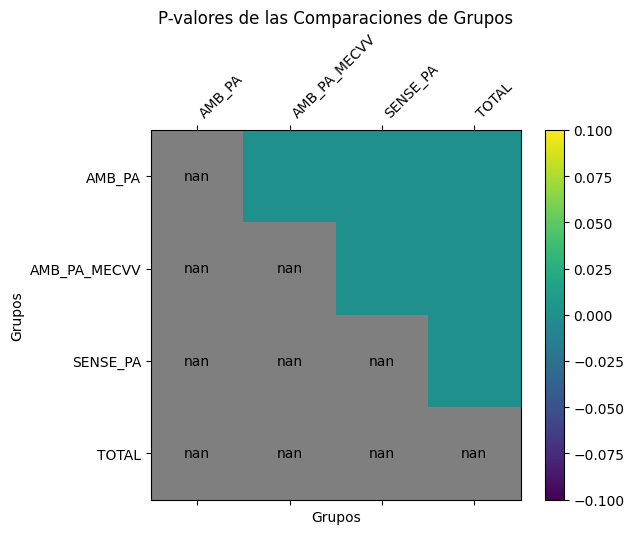

In [264]:
test_indepe_plot({'AMB_PA': AMB_PA['Urea'], 'AMB_PA_MECVV': AMB_PA_MECVV['Urea'], 'SENSE_PA': SENSE_PA['Urea'], 'TOTAL': TOTAL['Urea']})

NORMALITAT: Tots els grups, menys el quart (TOTAL), segueixen una distribució normal

### Filtrat glomerular CDK-EPI

In [265]:
AMB_PA.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(AMB_PA['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = AMB_PA['FGE CDK-EPI'].mean()
desviacio_estandard_fg = AMB_PA['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

In [266]:
AMB_PA_MECVV.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(AMB_PA_MECVV['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = AMB_PA_MECVV['FGE CDK-EPI'].mean()
desviacio_estandard_fg = AMB_PA_MECVV['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

In [267]:
SENSE_PA.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(SENSE_PA['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = SENSE_PA['FGE CDK-EPI'].mean()
desviacio_estandard_fg = SENSE_PA['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

In [268]:
TOTAL.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(TOTAL['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = TOTAL['FGE CDK-EPI'].mean()
desviacio_estandard_fg = TOTAL['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups, menys el primer (AMB_PA), segueixen una distribució normal

### Filtrat glomerular MDRD

In [269]:
AMB_PA.loc[:, 'FGE MDRD'] = pd.to_numeric(AMB_PA['FGE MDRD'], errors='coerce')

Mitjana_fgmd = AMB_PA['FGE MDRD'].mean()
desviacio_estandard_fgmd = AMB_PA['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

In [270]:
AMB_PA_MECVV.loc[:, 'FGE MDRD'] = pd.to_numeric(AMB_PA_MECVV['FGE MDRD'], errors='coerce')

Mitjana_fgmd = AMB_PA_MECVV['FGE MDRD'].mean()
desviacio_estandard_fgmd = AMB_PA_MECVV['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

In [271]:
SENSE_PA.loc[:, 'FGE MDRD'] = pd.to_numeric(SENSE_PA['FGE MDRD'], errors='coerce')

Mitjana_fgmd = SENSE_PA['FGE MDRD'].mean()
desviacio_estandard_fgmd = SENSE_PA['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

In [272]:
TOTAL.loc[:, 'FGE MDRD'] = pd.to_numeric(TOTAL['FGE MDRD'], errors='coerce')

Mitjana_fgmd = TOTAL['FGE MDRD'].mean()
desviacio_estandard_fgmd = TOTAL['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

#### Comparació distributiva

##### Normalitat i p-valor

In [273]:
test_indepe_plot({'AMB_PA': ['Glomerular Filtrate'], 'AMB_PA_MECVV': AMB_PA_MECVV['Glomerular Filtrate'], 'SENSE_PA': SENSE_PA['Glomerular Filtrate'], 'TOTAL': TOTAL['Glomerular Filtrate']})

ValueError: could not convert string to float: 'Glomerular Filtrate'